<a href="https://colab.research.google.com/github/lzeng11bc/DNNWithTensorflow/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 8 Dimensionality Reduction

##### Curse of Dimensionality
* **Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only this makes training extremely slow, it can also make it much harder to find a good solution.**

## The Curse of Dimensionality
* **The more dimesnsions the training set has, the greater risk of overfitting it**
* **One solution to the curse of dimensionality could be to increase the size of the traiing set to reach a sufficient desnity of training instances**
    * **Unfortunately,the number of training instances required to reach a given density grows exponentially with the number of dimensions**

## Main Apporachs for Dimensionality Reduction
### Projection
* **In most real-world problems, training instances are *not* spread out uniformly across all dimensions**
    * **Many features are almost constant, while others are highly correlated.**
* **As a result, all training instances actually lie within a much lower-dimensional *subspace* of the high-dimensional space**

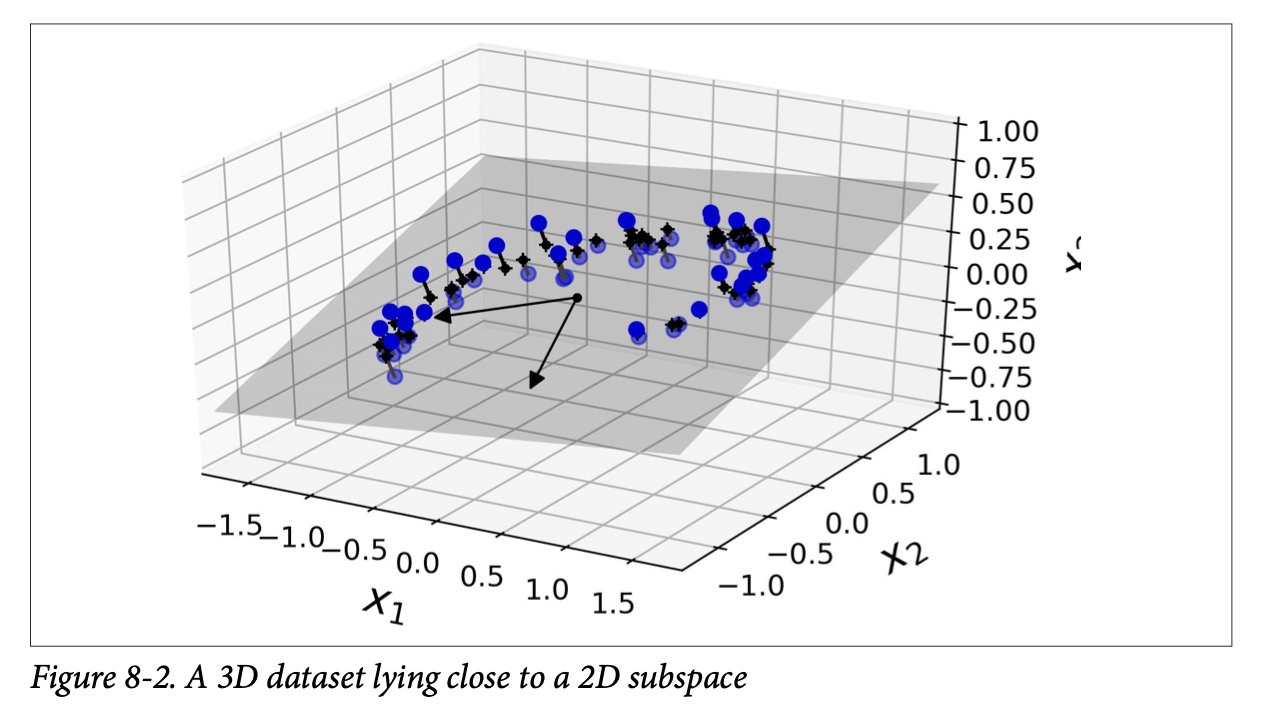

**All training instances lie close to a plane: this is a lower-dimensional(22D) subspace of the high-dimensional(3D) space**
* **Now if we project every training instance prendicularly onto this subspace, we get the 2D dataset**

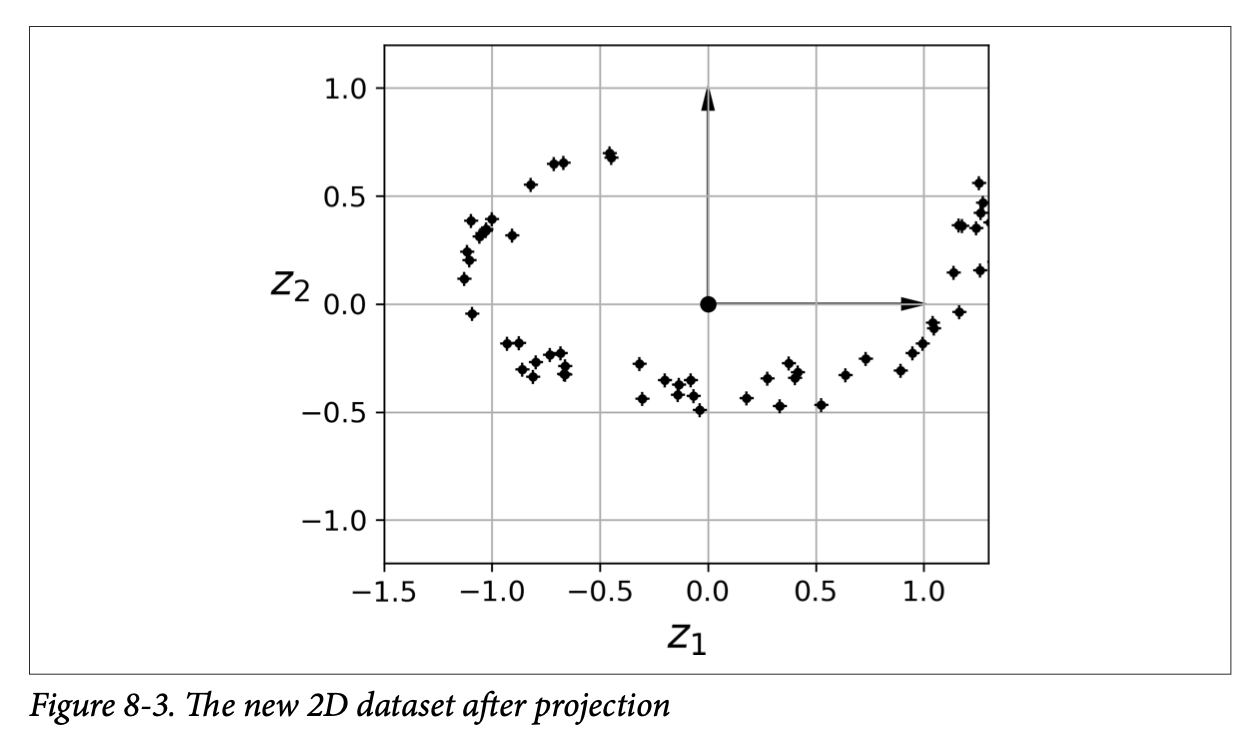

* **Projection is not always the best approach to dimensionality reducgtion. AS shown in the *swiss roll dataset***

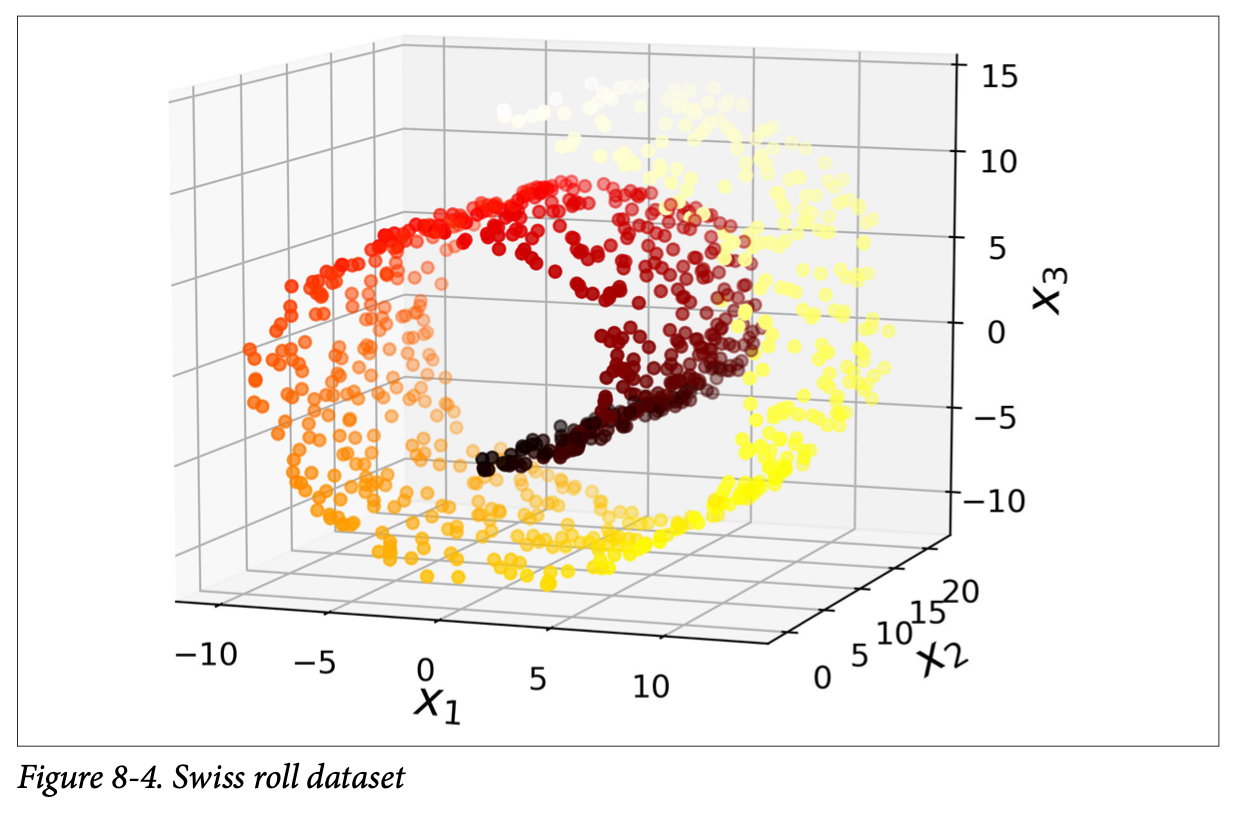

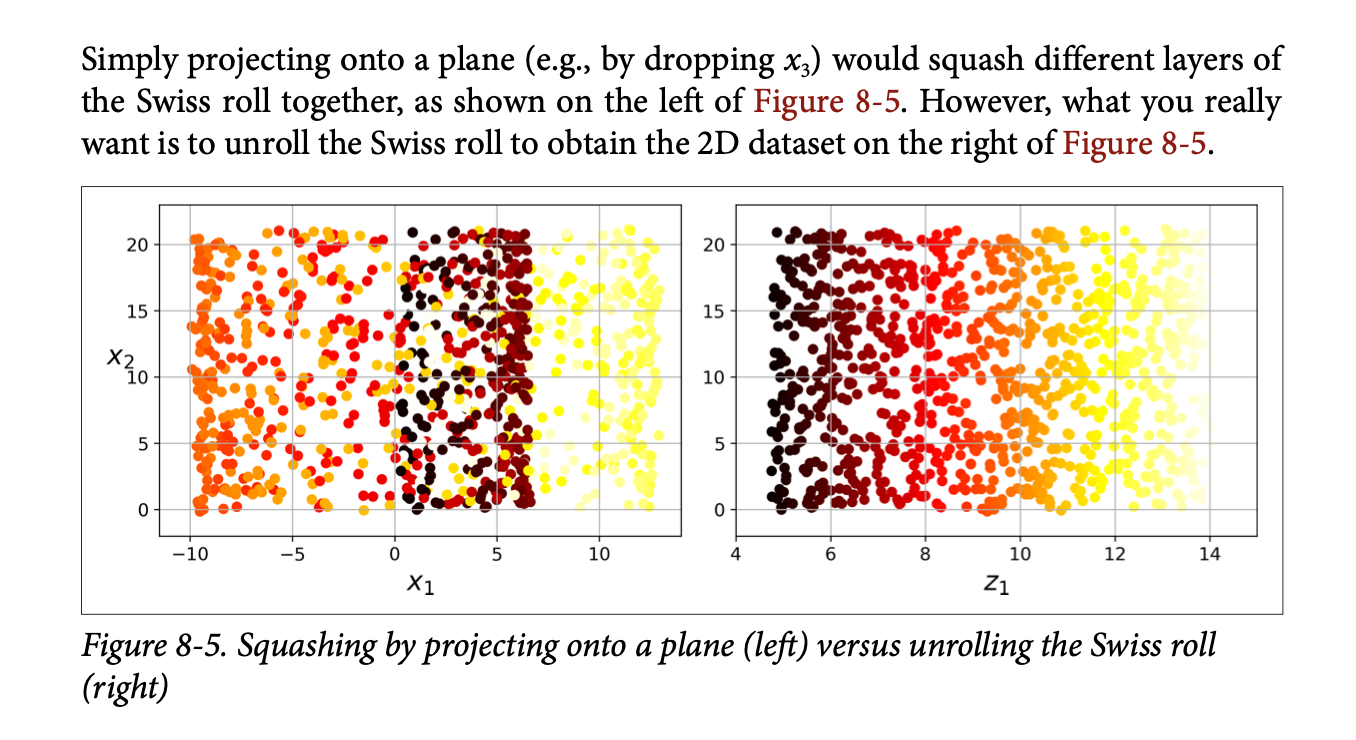

## Maniforld Learning
* **A 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space**
* **More generally, a d-dimensional manifold is a part of an n-dimensional space(where d < n) that locally resembles a d-dimensional hyperplane**


* **Many dimensionality reduction algorithms work by modeling the *manifold* on which the training instances lie; this is called *Manifold Learning***
    * **It relies on the *manifold assumption*, also called the *manifold hypothesis*, which hold that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold**
* **The manifold assumption is often accompanied by another implicit assumption: that the task at hand will be simpler if expressed in the lower-dimensional spaace of the manifold**


*In short, if you reduce the dimensionality of your training set before training a model, it will usually spped up training, but it may not lead to a better or simpler solution, it all depends on the dataset*

## PCA 
* **Before you can project the training set onto a lower dimensional hyperplane, you first need to choose the right hypeplane**
* **It seems reasonable to select the axis that preserves the maximum amount of variance. Another way to justify the choice is that the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis**

### Principal Components
* **PCA identifies the axis that accounts for the larges amount of variancr in the training set**
    * **It also find a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance.**
 
##### Principal Component
* **The unit vector that defines the $i^{th}$ axis is called the $i^{th}$ *principal component(PC)***
* **The direction of the principal components is not stable: if you perturb the training set slightly and run PCA again, some of the new PCs may point in the opposite direction of the original PCs**

**So how can you find the principal components of a training set?**
* **There is a standard matrix factoization technique called *Singulr Value Decomposition(SVD)* that can decompose the training set matrix $\pmb{X}$ into the matrix multiplication of three matrices $\pmb{U \Sigma}\pmb{V}^{T}$, where $\pmb{V}$ contains all the principal components that we are looking for.**


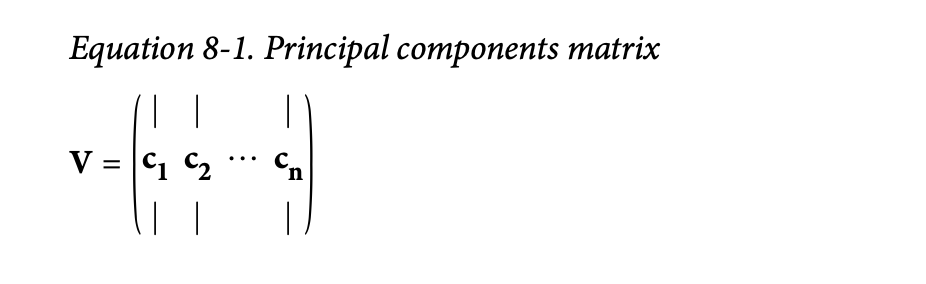

**The following Python code uses Numpy's** svd( ) **function to obtain all the principal components of the training set, then extracts the first two PCs**

In [1]:
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[: 0]
c2 = Vt.T[:, 1]

### Projecting Down to  Dimensions
* **Once you have identifies all the principal components, you can reduce the dimensionality of the dataset down to *d* dimensions by projectng it onto the hyperplane defined by the first *d* principal components**
    * **Selecting the hyperplane ensures that projecton will preserve as much variance as possible**
* **To project the training set onto the hyperplane, you can simply compute the matrix multiplication of the training set matrix $\pmb{X}$ by the mattrix $\pmb{W}_{d}$, defined as the matrix containing the first *d* principal components**

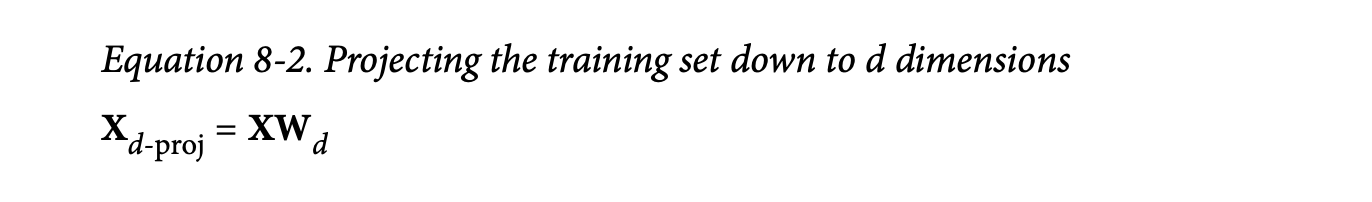

**The following python code projects the training set onto the plane defined by the first two principal components**

In [4]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

### Using Scikit-Learn
* **Scikit-Learn's** PCA **class implements PCA using SVD decompositions**
* **The following code applies PCA to reduce the dimensionality of the dataset down to two dimensions**

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

### Explained Variance Ratio
* **It indicates the proporton of the dataset's variance that lies along the axis of each principap components**

In [6]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

* **This tells you that 84.2% of the dataset's variance lies along the first axis, and 14.6% lies along the second axis**

### Choosing the Right Number of Dimensions
* **Instead of arbitrarily choosing the number of dimensions to reduce down to,it is generally preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance(e.g. 95%)**

**The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the training set's variance**

In [3]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [4]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [10]:
d

154

**Instead of specifyin the number of principal components you want to preserve, you can set** n\_components **to be a float between** 0.0 **and** 1.0, **indicatng the ratio of variance you wish to preserve**

In [11]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

* **Another option is to plot the explained variance as a function of the number of dimensions(simply plot** cumsum)
* **There will usually be an elbow in the curve, where the explained variances stops growing fast**

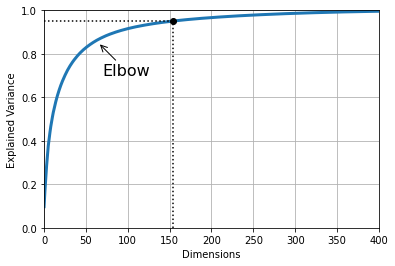

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

### PCA for Compression
* **So while most of the variance is preserved, the dataset is now less than 20% of its original size.**
* **It is also possible to decomprress the reduced dataset back to 784 dimensions by applying the inverse transformation of the PCA projection**
    * **The mean squared distance between the original data and the original data(compressed and then decompressed) is called the *reconstruction error***

**The following code compressed the MNIST dataset down to 154 dimensions, then uses the** inverse\_transform( ) **method to decompress it back to 784 dimensions**

In [13]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [14]:
import matplotlib as mpl

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

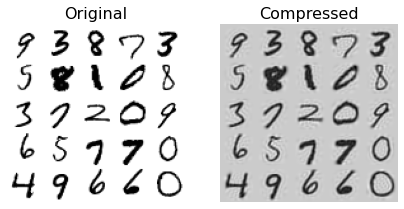

In [15]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

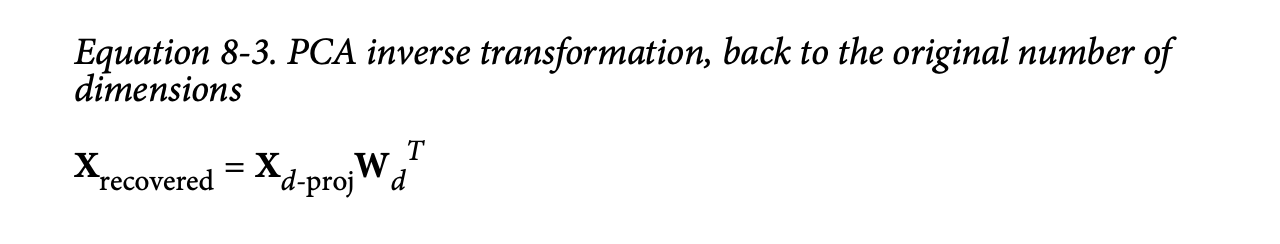

### Randomized PCA
* **If you set the** svd\_solver **hyperparameter to** "randomized", **Sk-Learn uses a stochastic algorithm called *Randomized* PCA that quickly finds an approximation of the first** d **principal components**
* **Its computational complexity is $O(m \times d^2) + O(d^3)$, instead of $O( m \times n^2) + O(n^3)$ for the full SVD appraoch, so it is dramatically faster than full SVD when *d* is much smaller than *n*:**

In [26]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced - rnd_pca.fit_transform(X_train)

array([[ 4.93616881e-09,  4.06633376e-08,  5.26954409e-08, ...,
         4.52946550e+01,  5.17266410e+00,  2.59109295e+01],
       [ 2.17594049e-08, -1.90395895e-08, -4.00768840e-09, ...,
         6.52159404e+01, -5.25095697e+01, -7.89585207e-01],
       [ 2.09461319e-08,  6.00175554e-09,  1.41047849e-08, ...,
         1.33594301e+01, -4.39276727e+01, -3.42802554e+01],
       ...,
       [-1.54216195e-09, -6.05447497e-08, -4.91507990e-09, ...,
        -1.59113990e+01, -1.37398526e+01, -5.07187978e+01],
       [ 2.57773536e-09,  4.77469939e-08,  1.18606707e-08, ...,
        -1.99242484e+01, -1.99023634e+01,  2.31431284e+01],
       [-2.24531505e-10, -1.47992409e-08,  4.18783372e-08, ...,
        -3.90097224e+01,  1.91245552e+01, -3.30098586e+00]])

* **By default,** svd\_solver **is actually set to** "auto": **SK-Learn automatically uses the randomized PCA algorithm if *m* or *n* is greater than 500 and *d* is less than 80% of *m* or *n*, or else it uses the full SVD approach**
* **If you want to force SK-Learn to use full SVD, you can set the** svd\_solver **hyperparameter to** "full"

### Incremental PCA
* **The one problem with the preceding implementation of PCA is that they require the whole training set to fit in memory in order for the algorithm to run**
* ***Incremental PCA* allows you to split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time**
    * **This is useful for large training sets, and also to apply PCA online**

* **The following code splits the MNIST dataset into 100 mini-batches(using Numpy's** array\_split( ) **function) and feeds them to SK-Learn's** IncrementalPCA class **to reduce the number of dimensionality of the MNIST dataset down to 154 dimensions**
* **You must call the** partial\_fit( ) **method with each mini-batch rather tna the** fit( ) **method with the whole training set**

In [16]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

* **Alternatively you can use** NumPy's memmap **class, which allows you to manipulate a large array stored in a binary file on disk as if it were entirely in memory; the class loads only the data it needs in memory, when it needs it**
* **Since the** IncrementalPCA **class uses only a small part of the array at any given time, the memory usage remains under control**
* **This makes it possible to call the usual** fit( ) **mehotd**

In [ ]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

### Kernel PCA
* **Kernel: a mathematical techniqu that implicitly maps instances into a very high-dimensional space(called the *feature space*), enabling nonlinear classification and regression with Support Vector Machines**
* **A linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the *original space***

###### kPCA
* **The following code uses Scikit-Learn's** KernelPCA **Class to perform* kPCA **with an RBF kernel**

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

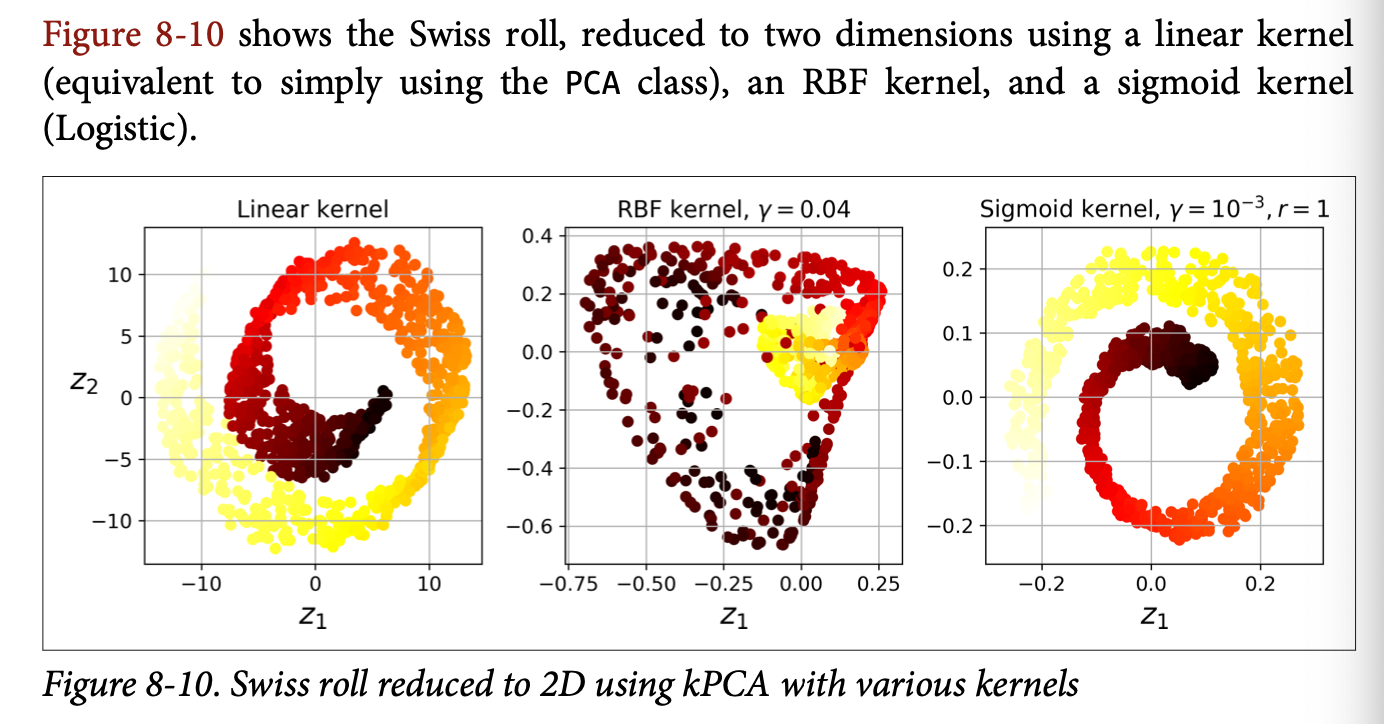

### Selecting a Kernel and Tuning Hyperparameters
* **As kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel and hyperparameter values**
* **Since dimensionality reduction is often a preparation step for a supervised learning task, so you can simply use grid search to select the kernel and hyperparameters that lead to the best performance on the task**


**The following code creates a two-step pipeline, first reducing dimensionality to two dimensions using kPCA, then applying Logistic Regression for classification. Then it uses** GridSearchCV **to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA

clf = Pipeline([
                ("kpca", KernelPCA(n_components=2)),
                ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

* **The best kernel and hyparameters are then availiable through the** best\_params\_

* **Another approach, this time entirely unsupervissed, is to select the kernel and hyperparameters that yield the lowest reconstruction error.**

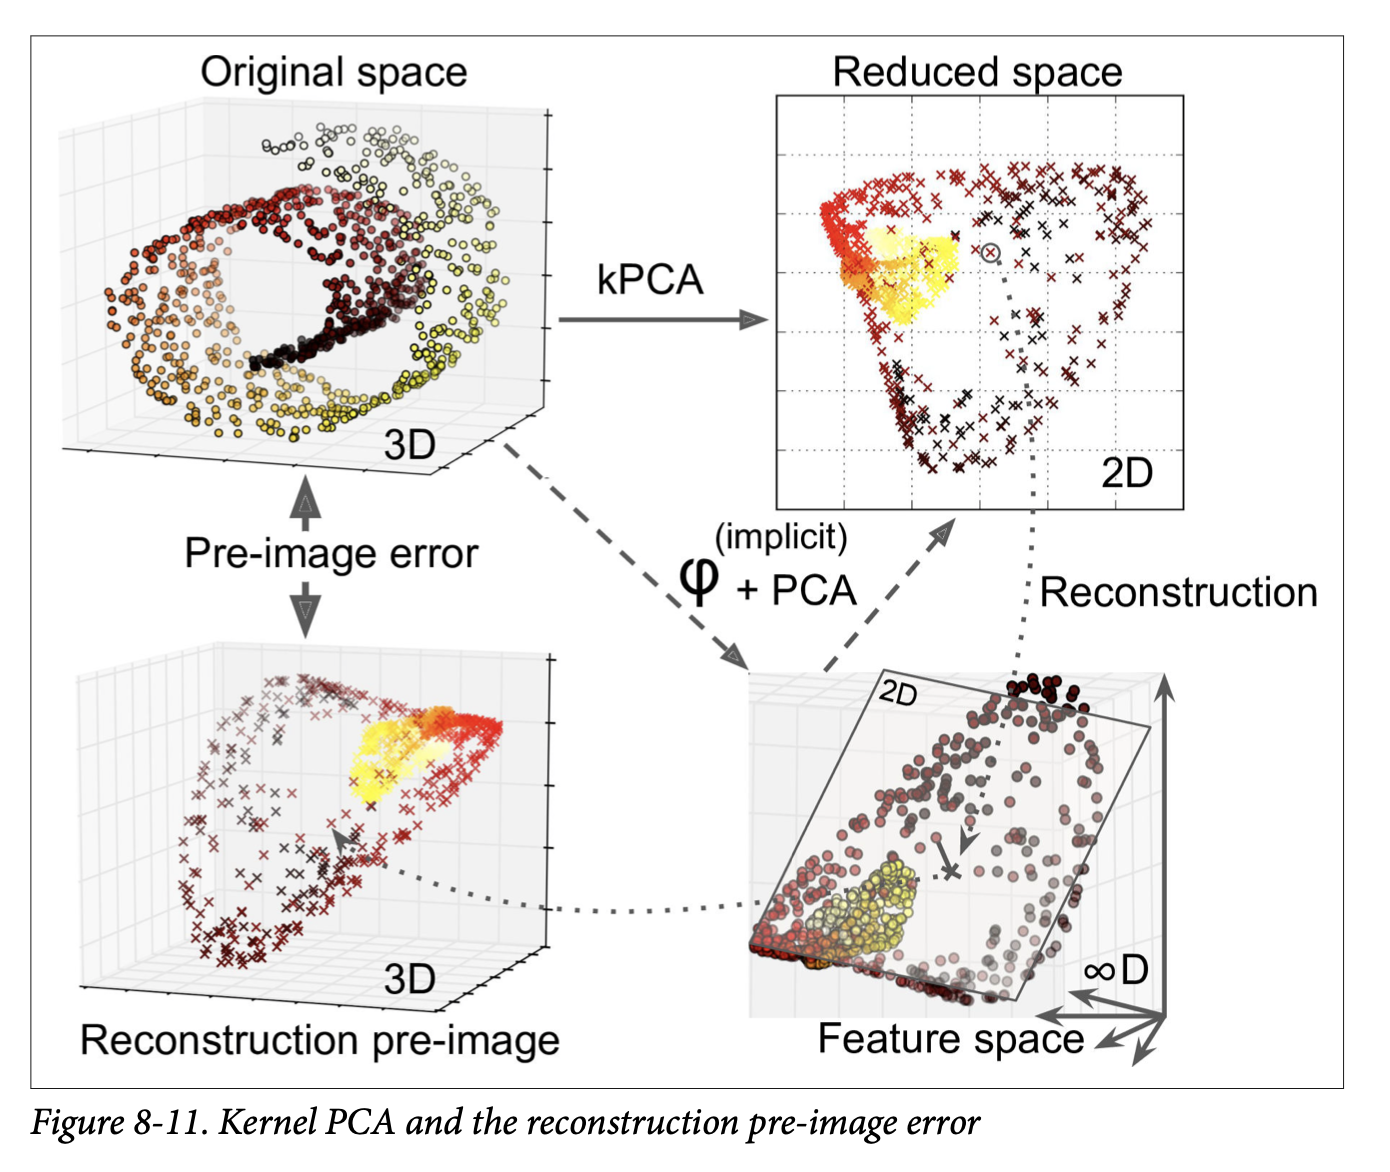

* **Thnaks to the kernel trick, this is mathematically equivalent to mapping the training set to an infinite-dimensional feature space using the *feature map* $\varphi$, then projecting the transformed training set down to 2D using linear PCA.**
* **Since the feature space is infinite-dimensional, we cannot compute the reconstructed point, and therefore we cannot compute true reconstruction error.**
    * **This is called the reconstruction *pre-image***
    * **Once you have this pre-image, you can measure its squared distance to the original instance. You can hen select the kernel and hyperparameters that minimize this reconstruction pre-image error.**


**One instance to perform this reconstruction is to train a supervised regression model, with the projected instances as the training set and the original instances as the targets**<br>
* **SK-Learn will do this automatically if you set the** fit\_inverse\_transform=True

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

**By default,** fit\_inverse\_transform=False **and** KernelPCA **has no** inverse\_transform( ) **method. This method only gets created when you set** fit\_inverse\_transform=True

**You can then compute the pre-image error**

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

### LLE
* **Locally Linear Embedding(LLE) is another very powerful *nonlinear dimensionality reduction*(NLDR) technique**
* **LLE works by first measuring how each training instance linearly relates to its closest neighbors, and then looking for a low-dimensional representation of the training set where these local relationships are best preserved.**
    * **This makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise**

* **The following code uses SK-Learn's** LocallyLinearEmbedding **to unroll the swiss roll**

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

##### How LLE Works
* **First, for each training instance $\pmb{x}^{(i)}$, the algorithm identifies its *k* closest neighbors, then tries to reconstrunct $\pmb{x}^{(i)}$ as linear function of these neighbors**
    * **More specifically, it finds the weights of $w_{i, j}$ such that the squared sitances between $\pmb{x}^{(i)}$ and $\sum_{j=1}^m w_{i, j} \pmb{x}^{(j)}$, assuming $w_{i, j}=0$ if $\pmb{x}^{(j)}$ is not the *k* closest neighbors of $\pmb{x}^{(i)}$**
    * **Thus, the first step of LLE is the constrained optimization problem described in the formula below**

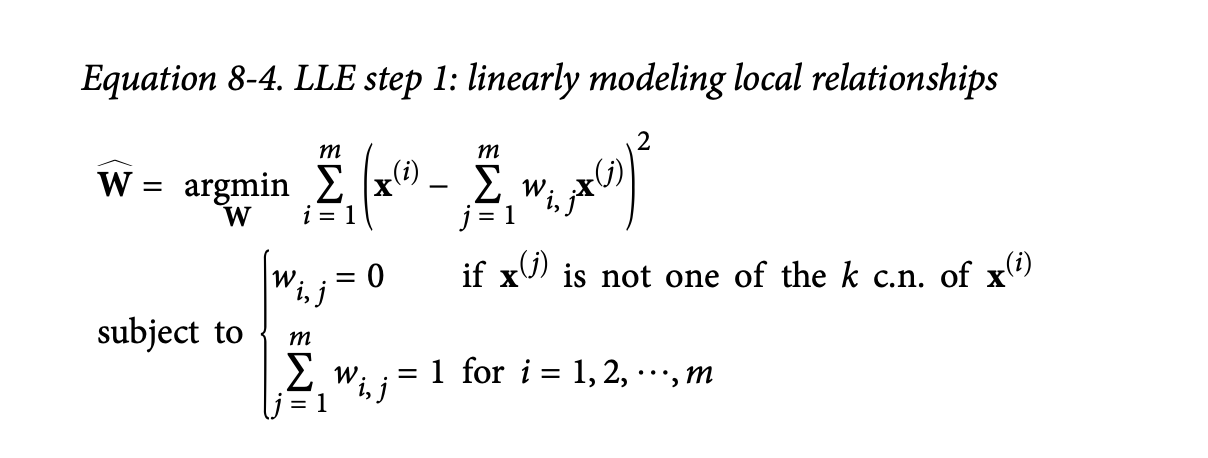

* **$\pmb{W}$ is the weight matrix containing all the weights $w_{i, j}$.**
* **The second constrained simply normalizes the weights for each training instance $\pmb{x}^{(i)}$**

* **After the first step, the weight matrix $\pmb{W}$ (containg the weights $w_{i,j}$) encodes the local linear relationships between the training instances.**
* **Now the second step is to ma the training instances into a *d*\-dimensional space (where $d<n$) while preserving these local relationships as much as possible**
* **If $\pmb{z}^{(i)}$ is the image of $\pmb{x}^{(i)}$ in this d\-dimensional space, then we want the squared distance between $\pmb{z}^{(i)}$ and $\sum_{j=1}^{m} w_{i, j} \pmb{z}^{(j)}$ to be as small as possible**
* **This is very similar to the first step, but instead of keeping the instances fixed and findng the optimal weights, we are doing the reverse: keeing the weights fixed and finding the optimal position of he instances' images in the low-dimensional space**

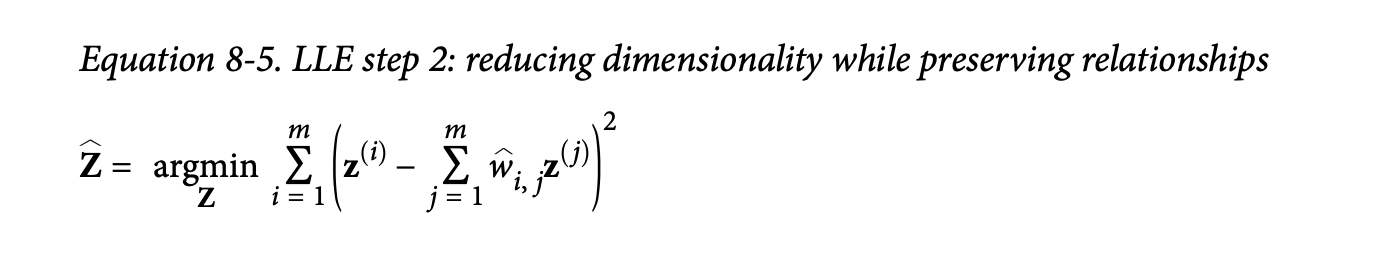

**$\pmb{Z}$ is the matrix containing all $\pmb{z}^{(i)}$**<br>
* **SK-Learn's LLE implementation has the following computationa complexity: $O(m log(m)n log(k))$ for finding the k nearest neighbors, $O(mnk^3)$ for optimizing the weights, and $O(dm^2)$ for constructing the low-dimensional representation**
* **This makes this algorithm scale poorly to very large datasets**

## Other Dimensionality Reduction Techniques

##### Multidimensional Scaling
* **Redues dimensionality while trying to presevr the disntaces between the instances**

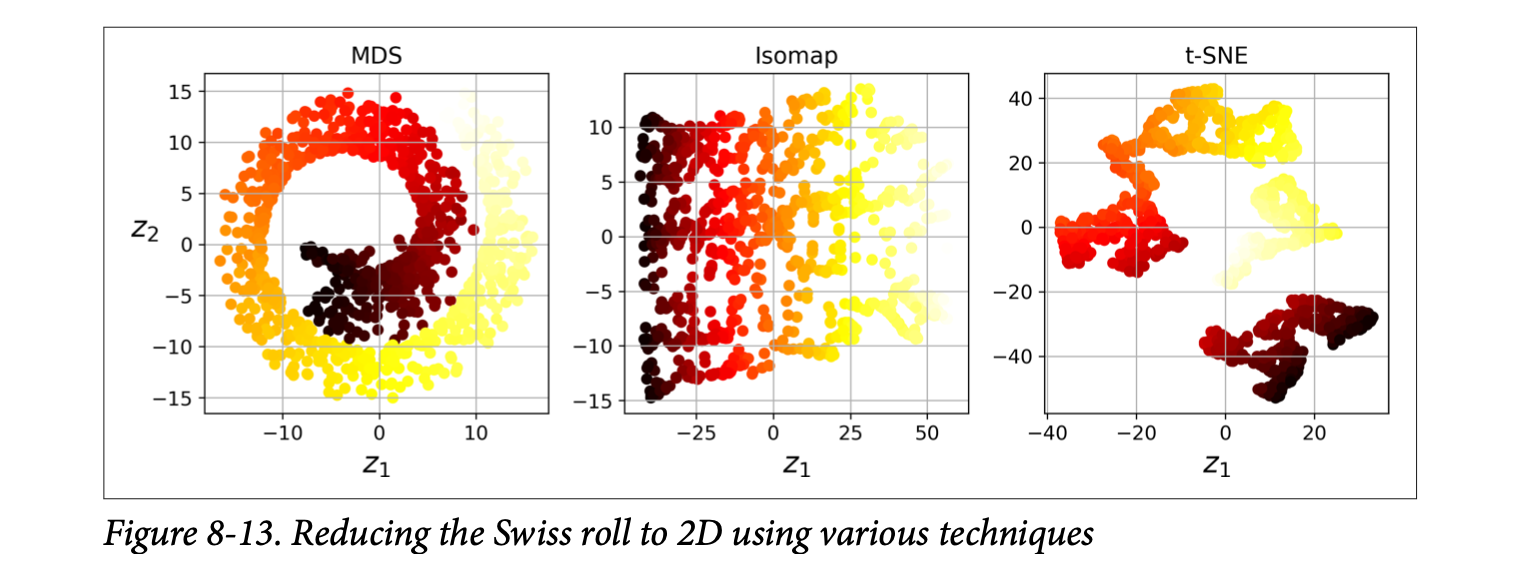

##### Isomap
* **Creates a graph by connecting each instance to its nearest neighbors, then reduce dimensionality while trying to preserve the *geodesic distances* betweent the instances**

##### t-Distributed Stochastic Neighbor Embedding
* **(t-SNE) reduces dimensionality while trying to keep similar instances close and dissimilar instances apart**

##### Linear Discriminant Analysis(LDA)
* **This is actually a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane on to which to project the data**
    * **The benefit is the projectio will keep the classes as far apart as possible, so LDA is a good technique to reduce dimensionality before running another algorithm such as an SVM classifier**
